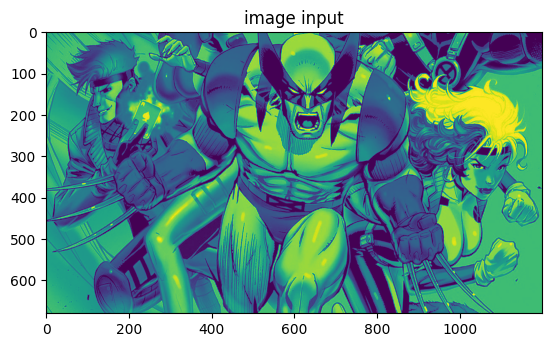

In [112]:
import cv2 as cv
import numpy as np
import io
from matplotlib import pyplot as plt

img = cv.imread('img.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
#cv.imshow('imagem input',img)
#cv.waitKey(0)
#cv.destroyAllWindows()
plt.imshow(img)
plt.title('image input')
plt.show()



In [132]:
operation_code = 2
'''
1 - erosão
2 - dilatação
3 - abertura
4 - fechamento
'''


'\n1 - erosão\n2 - dilatação\n3 - abertura\n4 - fechamento\n'

In [128]:
image_save_name = 'image_out.jpg'

In [114]:
def erosao(imagem, elemento_estruturante):
  """
  Realiza a operação de erosão em uma imagem.

  Args:
      imagem: Matriz NumPy que representa a imagem original.
      elemento_estruturante: Matriz NumPy que representa o elemento estruturante.

  Returns:
      imagem_erodida: Matriz NumPy que representa a imagem erodida.
  """
  
  altura = imagem.shape[0]
  largura = imagem.shape[1]
  elemento_centro = elemento_estruturante.shape[0] // 2
  pad_h = elemento_centro
  pad_w = elemento_centro
  imagem_pad = np.pad(imagem, ((pad_h, pad_h), (pad_w, pad_w)), 'constant')
  imagem_erodida = np.zeros_like(imagem)
  
  for y in range(altura):
    for x in range(largura):
      janela = imagem_pad[y:y + elemento_centro * 2, x:x + elemento_centro * 2]
      
      if np.all(janela == elemento_estruturante):
        imagem_erodida[y, x] = imagem[y, x]

  return imagem_erodida


In [115]:
elemento_estruturante = np.array([
    [1, 1],
    [1, 1],
    
])
print(img.shape)
img_out = erosao(img , elemento_estruturante)

(680, 1200)


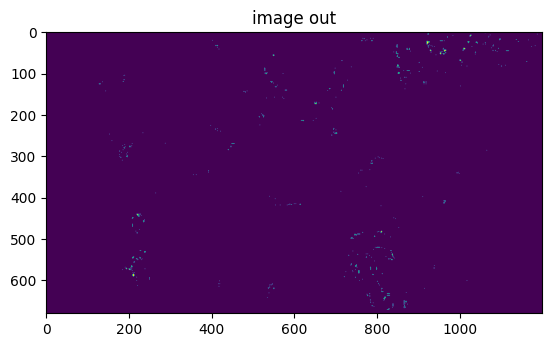

In [116]:
plt.imshow(img_out)
plt.title('image out')
plt.show()

In [117]:
def dilatacao(imagem, elemento_estruturante):
  """
  Realiza a operação de dilatação em uma imagem.

  Args:
      imagem: Matriz NumPy que representa a imagem original.
      elemento_estruturante: Matriz NumPy que representa o elemento estruturante.

  Returns:
      imagem_dilatada: Matriz NumPy que representa a imagem dilatada.
  """

  altura, largura = imagem.shape
  elemento_centro = elemento_estruturante.shape[0] // 2
  pad_h = elemento_centro
  pad_w = elemento_centro
  imagem_pad = np.pad(imagem, ((pad_h, pad_h), (pad_w, pad_w)), 'constant')
  imagem_dilatada = np.zeros_like(imagem)

  for y in range(altura):
    for x in range(largura):
      janela = imagem_pad[y:y + elemento_centro * 2, x:x + elemento_centro * 2]
      if np.any(janela == elemento_estruturante):
        imagem_dilatada[y, x] = 255

  return imagem_dilatada


In [118]:
elemento_estruturante = np.array([
    [0, 1],
    [1, 0],
    
])
print(img.shape)
img_out = dilatacao(img , elemento_estruturante)

(680, 1200)


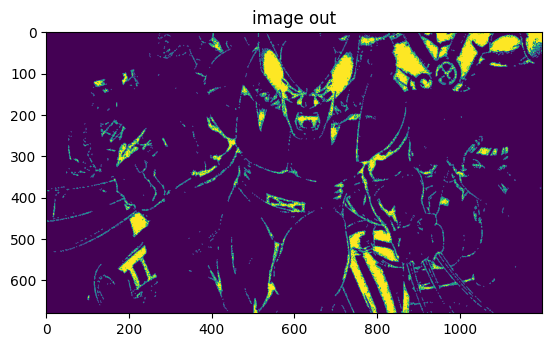

In [119]:
plt.imshow(img_out)
plt.title('image out')
plt.show()

In [120]:
def abertura(imagem, elemento_estruturante):
  """
  Realiza a operação de abertura em uma imagem.

  Args:
      imagem: Matriz NumPy que representa a imagem original.
      elemento_estruturante: Matriz NumPy que representa o elemento estruturante.

  Returns:
      imagem_aberta: Matriz NumPy que representa a imagem aberta.
  """

  imagem_erodida = erosao(imagem, elemento_estruturante)
  imagem_aberta = dilatacao(imagem_erodida, elemento_estruturante)

  return imagem_aberta

In [121]:
elemento_estruturante = np.array([
    [0, 1],
    [1, 0],
    
])
print(img.shape)
img_out = abertura(img , elemento_estruturante)

(680, 1200)


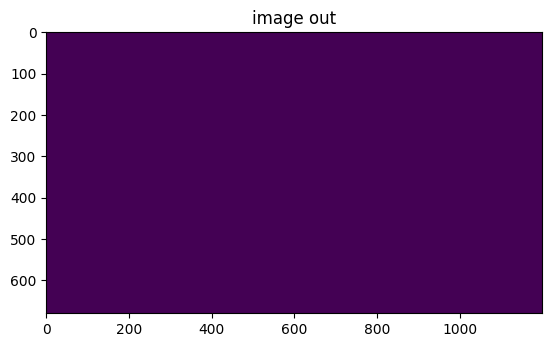

In [122]:
plt.imshow(img_out)
plt.title('image out')
plt.show()

In [123]:
def fechamento(imagem, elemento_estruturante):
  """
  Realiza a operação de fechamento em uma imagem.

  Args:
      imagem: Matriz NumPy que representa a imagem original.
      elemento_estruturante: Matriz NumPy que representa o elemento estruturante.

  Returns:
      imagem_fechada: Matriz NumPy que representa a imagem fechada.
  """

  imagem_dilatada = dilatacao(imagem, elemento_estruturante)
  imagem_fechada = erosao(imagem_dilatada, elemento_estruturante)

  return imagem_fechada

In [124]:
elemento_estruturante = np.array([
    [1, 0],
    [0, 1],
    
])
print(img.shape)
img_out2 = fechamento(img , elemento_estruturante)

(680, 1200)


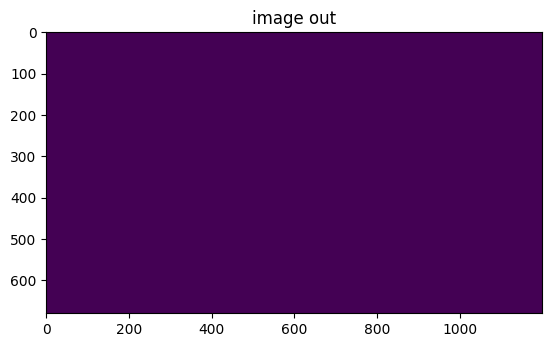

In [125]:
plt.imshow(img_out2)
plt.title('image out')
plt.show()

In [133]:
img_procss_out = ''
match operation_code:
    case 1:
        img_procss_out = erosao(img , elemento_estruturante)
    case 2:
        img_procss_out = dilatacao(img , elemento_estruturante)
    case 3:
        img_procss_out = abertura(img , elemento_estruturante)
    case 4:
        img_procss_out = fechamento(img , elemento_estruturante)

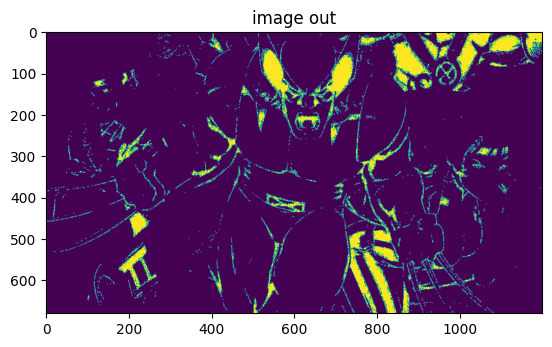

In [134]:
plt.imshow(img_procss_out)
plt.title('image out')
plt.show()

In [135]:
cv.imwrite(image_save_name, img_procss_out)

True